# Notebook for Grand Canyon Cardenas Basalts and Unkar Intrusions structural orientation compilation

In [1]:
import numpy as np
import pandas as pd

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag


import matplotlib.pyplot as plt
from IPython.display import display
import mplstereonet


%config InlineBackend.figure_format = 'retina'

## Summary table

| site | locality | bedding strike | bedding dip |
|-------|----------|---------------|--------------|
| CB1, CB2, CB3, CB4, CB5| Little Nankoweap Trail | 291.7 | 21.7 |
| CB6, CB7 | Lava Chuar Canyon| 319.6 | 12.8 |
| CB8, CB9, CB10, CB11, CB12, CB13| |
|CB14, CB15, CB16, CB17, CB18, CBS1| Basalt Canyon | 274.8 | 10.4 |
| UI1 | Red Canyon | 285.5 | 14.0 |
| UI2 | Hance Dike | 235.4 | 23.9 |
| UI3 | Hance Sill | 352.8 | 11.3 |
| UI4 | Hotauta Canyon | 300.6 | 28.7 |
| UI5 | Stone Creek | 318.7 | 12.0 |

## Little Nankoweap Trail CB1, CB2, CB3, CB4, CB5, RM 52

Considered as the same dip panel. A combination of Nankoweap and Cardenas bedding orientation will be averaged and used as the bedding correction for these pmag sample

In [2]:
RM52_bedding_data = pd.read_csv('../data/orientations/RM52.csv')
RM52_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.892050,36.283027,419888.9502,4015710.131,36.283027,-111.892050,12S,Bedding,23.599085,31.039431,301.039429,10.436951,Cardenas,Sun Apr 11 18:12:59 2021
1,-111.892096,36.283039,419884.7891,4015711.450,36.283039,-111.892096,12S,Bedding,14.965729,22.923203,292.923218,10.436951,Cardenas,Sun Apr 11 18:11:31 2021
2,-111.892088,36.283048,419885.5926,4015712.446,36.283048,-111.892088,12S,Bedding,16.148088,33.231579,303.231567,10.436951,Cardenas,Sun Apr 11 18:10:54 2021
3,-111.892010,36.283017,419892.5441,4015708.904,36.283017,-111.892010,12S,Bedding,19.843470,36.377808,306.377808,10.436951,Cardenas,Sun Apr 11 18:10:15 2021
4,-111.891927,36.282993,419899.9199,4015706.216,36.282993,-111.891927,12S,Bedding,20.014641,15.147797,285.147797,10.436951,Cardenas,Sun Apr 11 17:02:20 2021


In [3]:
RM52_bedding_data['pole_trend'] = (RM52_bedding_data['dipAzimuth']+180)
RM52_bedding_data['pole_plunge'] = 90-RM52_bedding_data['dip']
RM52_bedding_poles_mean = ipmag.fisher_mean(RM52_bedding_data['pole_trend'].tolist(),RM52_bedding_data['pole_plunge'].tolist())
RM52_bedding_mean = ipmag.fisher_mean(RM52_bedding_data['strike'].tolist(),RM52_bedding_data['dip'].tolist())

print('mean strike: ', round(RM52_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM52_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM52_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM52_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM52_bedding_poles_mean['inc'],2))

mean strike:  291.7  mean dip dir:  21.7  mean dip:  19.7


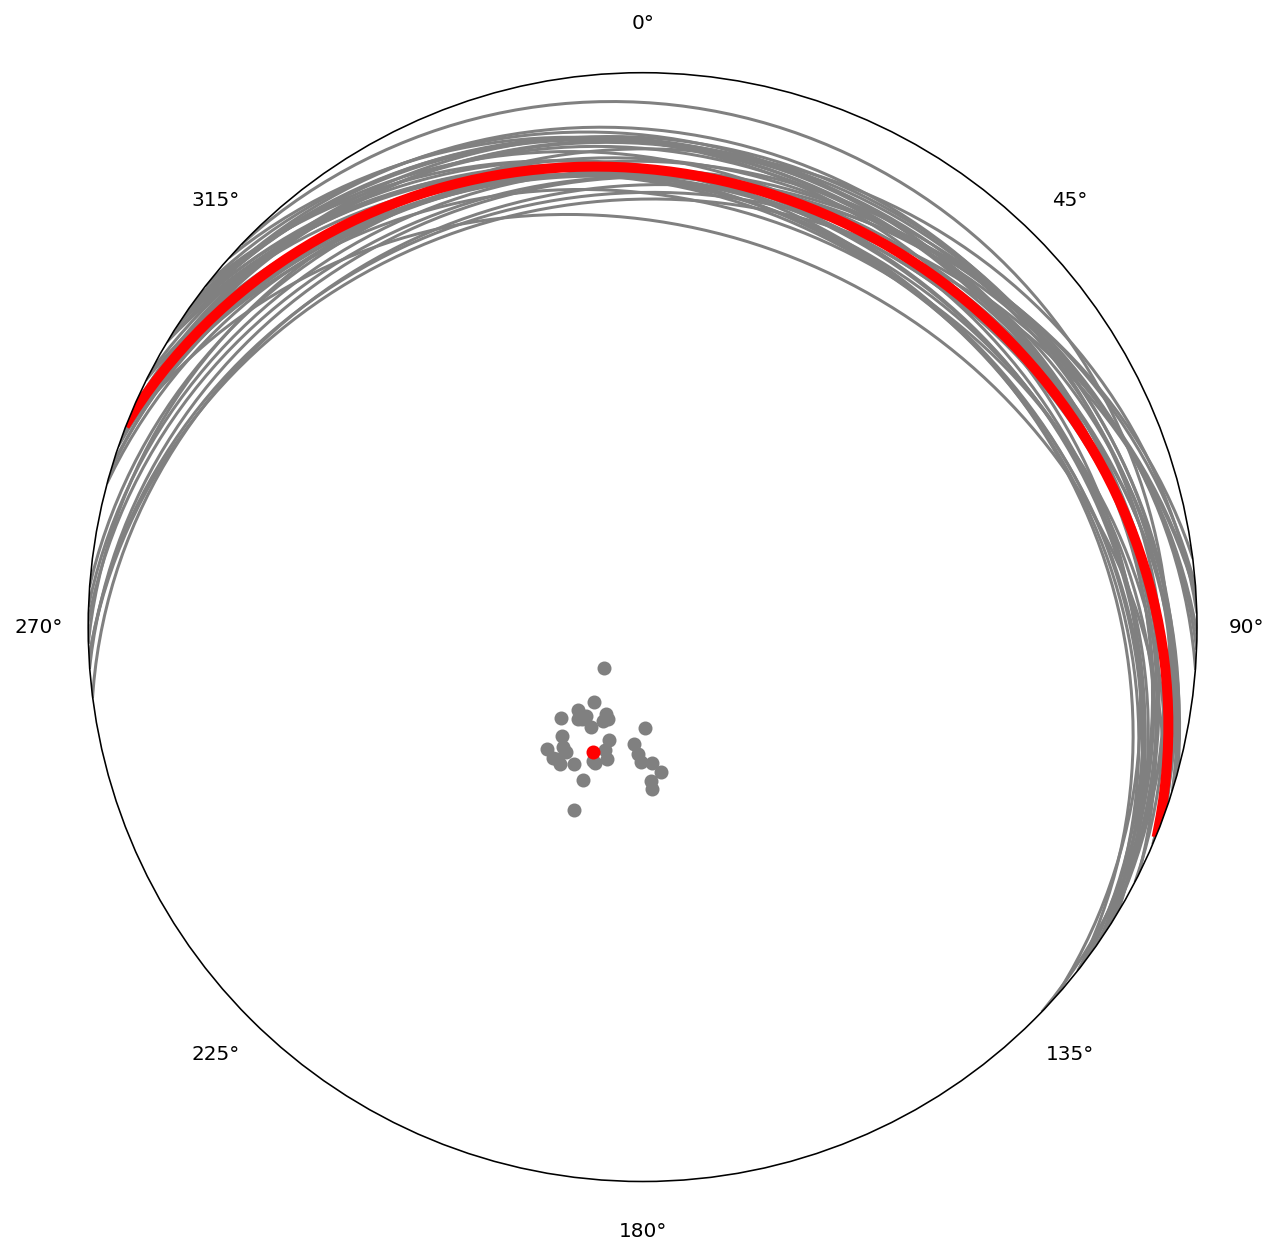

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM52_bedding_data['strike'], RM52_bedding_data['dip'],color='grey')
ax.plane(RM52_bedding_mean['dec'], RM52_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM52_bedding_data['strike'], RM52_bedding_data['dip'],color='grey')
ax.pole(RM52_bedding_mean['dec'], RM52_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

## Lava Chuar canyon CB6, CB7, RM 65

Considered as the same dip panel. All measurements on Cardenas Basalt.

In [5]:
RM65_bedding_data = pd.read_csv('../data/orientations/RM65.csv')
RM65_bedding_data

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.826948,36.146496,425606.4075,4000513.833,36.146496,-111.826948,12S,Bedding,13.996822,53.372433,323.372436,10.436951,Cardenas,Tue Apr 13 17:00:24 2021
1,-111.826949,36.146499,425606.3477,4000514.268,36.146499,-111.826949,12S,Bedding,12.831398,42.775021,312.775024,10.436951,Cardenas,Tue Apr 13 17:00:03 2021
2,-111.826965,36.146503,425604.9457,4000514.661,36.146503,-111.826965,12S,Bedding,12.097278,48.065311,318.065308,10.436951,Cardenas,Tue Apr 13 16:59:57 2021
3,-111.826965,36.146502,425604.8966,4000514.537,36.146502,-111.826965,12S,Bedding,11.348624,68.062584,338.062592,10.436951,Cardenas,Tue Apr 13 16:59:51 2021
4,-111.826957,36.146493,425605.5892,4000513.565,36.146493,-111.826957,12S,Bedding,12.561063,35.950993,305.950989,10.436951,Cardenas,Tue Apr 13 16:59:42 2021


In [6]:
RM65_bedding_data['pole_trend'] = RM65_bedding_data['dipAzimuth']-180
RM65_bedding_data['pole_plunge'] = 90-RM65_bedding_data['dip']
RM65_bedding_poles_mean = ipmag.fisher_mean(RM65_bedding_data['pole_trend'].tolist(),RM65_bedding_data['pole_plunge'].tolist())
RM65_bedding_mean = ipmag.fisher_mean(RM65_bedding_data['strike'].tolist(),RM65_bedding_data['dip'].tolist())

print('mean strike: ', round(RM65_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM65_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM65_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  319.6  mean dip dir:  49.6  mean dip:  12.8


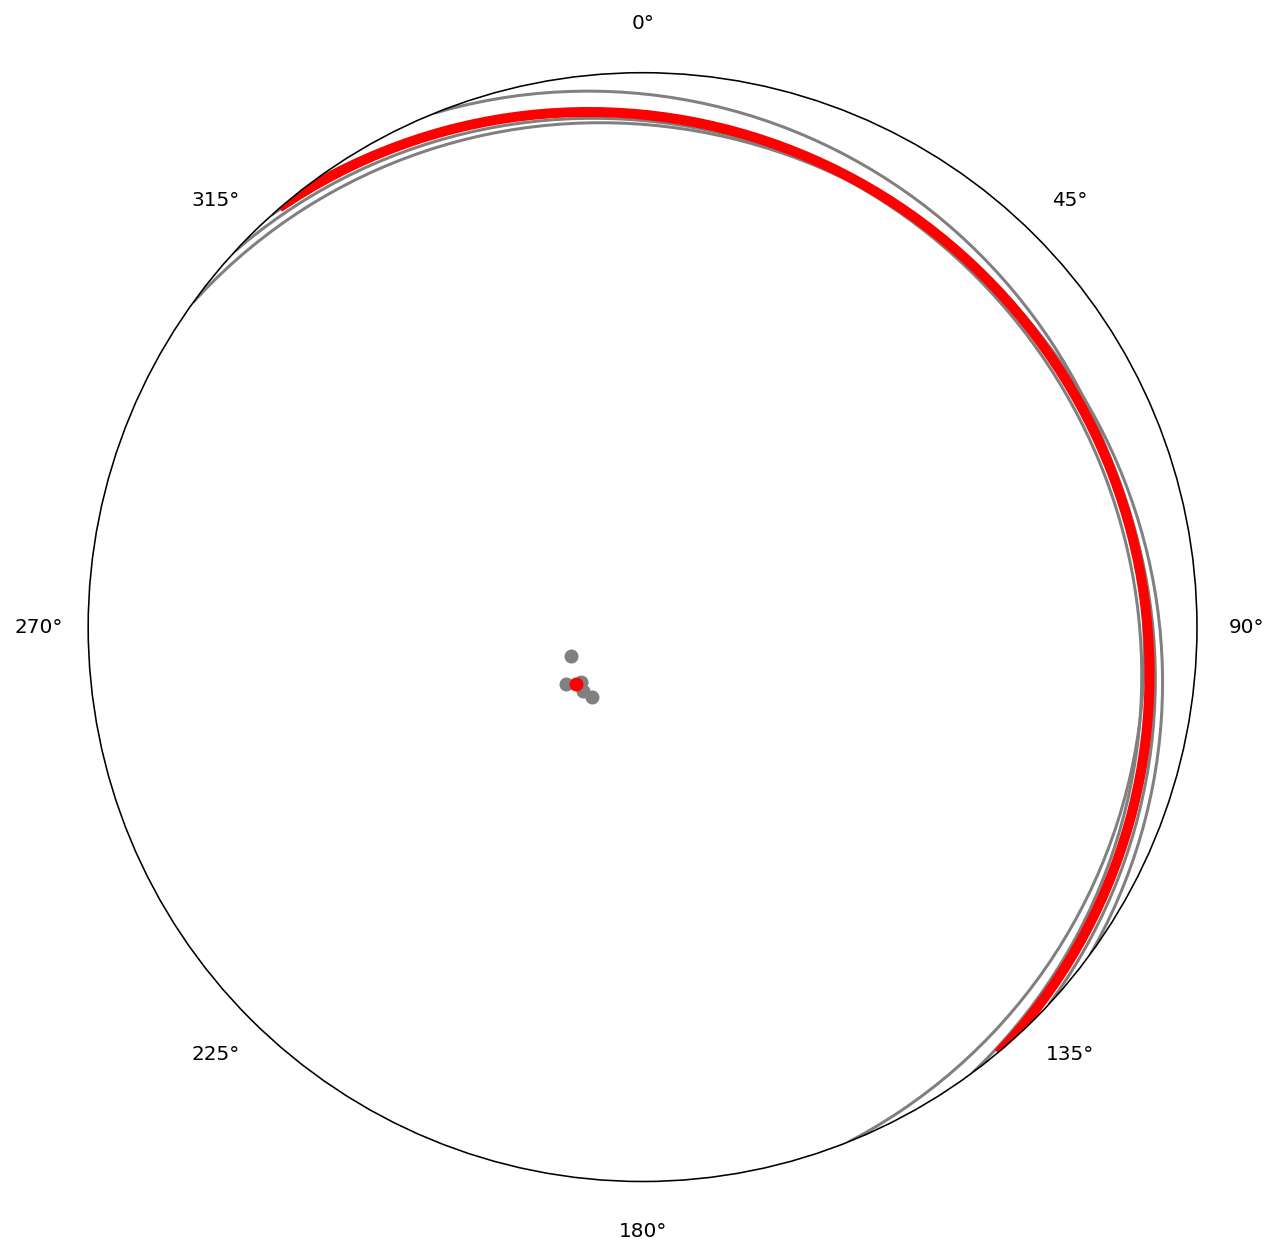

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM65_bedding_data['strike'], RM65_bedding_data['dip'],color='grey')
ax.plane(RM65_bedding_mean['dec'], RM65_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM65_bedding_data['strike'], RM65_bedding_data['dip'],color='grey')
ax.pole(RM65_bedding_mean['dec'], RM65_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

## Basalt Canyon CB8, CB9, CB10, CB11, CB12, CB13, CB14, CB15, CB16, CB17, CB18, CBS1, RM70
Considered as the same dip panel. All measurements are done on Cardenas Basalt and the interflow sediments CBS1 that were baked by the overlying basalt flow. There are also bedding orientations taken on the Dox Fm which is below the basalts. We compare the average orientations between the Dox and the Cardenas. 

In [8]:
RM70_bedding_data = pd.read_csv('../data/orientations/RM70.csv')
RM70_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.848849,36.108388,423599.1964,3996303.897,36.108388,-111.848849,12S,Bedding,11.713124,49.583504,319.583496,10.436951,Cardenas,Wed Apr 14 13:38:37 2021
1,-111.848825,36.108405,423601.4377,3996305.818,36.108405,-111.848825,12S,Bedding,11.399177,38.359962,308.359955,10.436951,Cardenas,Wed Apr 14 13:38:27 2021
2,-111.848860,36.108402,423598.2357,3996305.445,36.108402,-111.848860,12S,Bedding,11.969531,43.898415,313.898407,10.436951,Cardenas,Wed Apr 14 13:37:47 2021
3,-111.848855,36.108361,423598.6565,3996300.950,36.108361,-111.848855,12S,Bedding,13.430076,49.699547,319.699554,10.436951,Cardenas,Wed Apr 14 13:37:23 2021
4,-111.848835,36.108324,423600.4076,3996296.834,36.108324,-111.848835,12S,Bedding,11.491586,46.932640,316.932648,10.436951,Cardenas,Wed Apr 14 13:37:15 2021


In [9]:
RM70_bedding_data['pole_trend'] = RM70_bedding_data['dipAzimuth']-180
RM70_bedding_data['pole_plunge'] = 90-RM70_bedding_data['dip']
RM70_bedding_poles_mean = ipmag.fisher_mean(RM70_bedding_data['pole_trend'].tolist(),RM70_bedding_data['pole_plunge'].tolist())
RM70_bedding_mean = ipmag.fisher_mean(RM70_bedding_data['strike'].tolist(),RM70_bedding_data['dip'].tolist())

print('mean strike: ', round(RM70_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM70_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM70_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  274.8  mean dip dir:  4.8  mean dip:  10.4


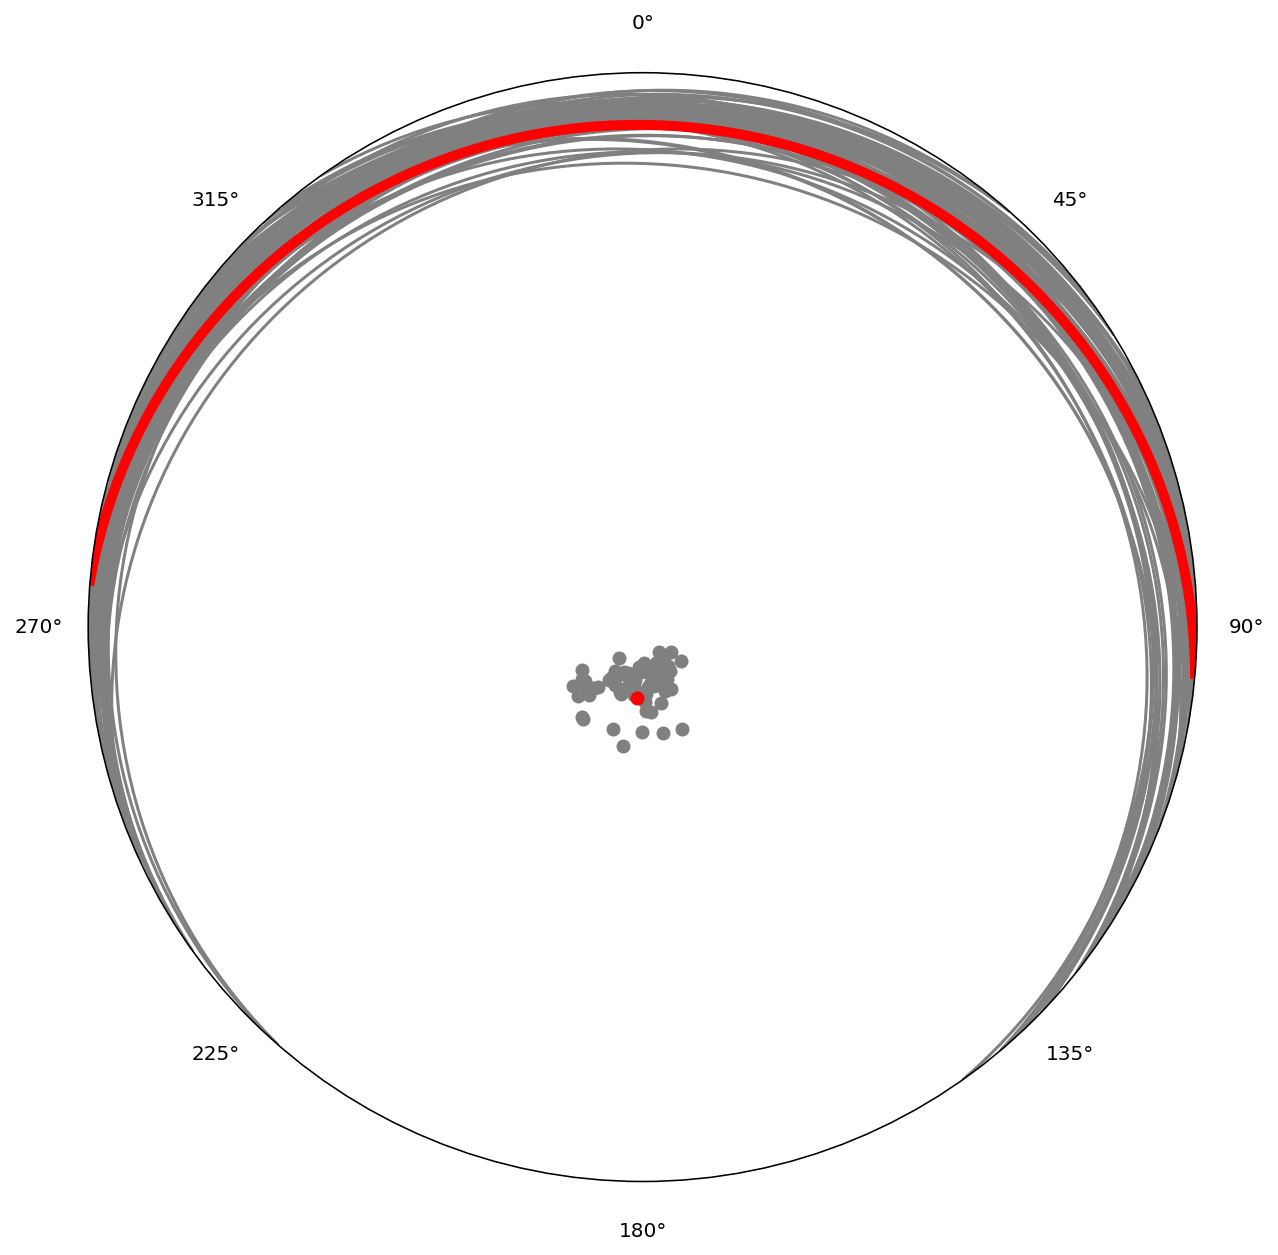

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM70_bedding_data['strike'], RM70_bedding_data['dip'],color='grey')
ax.plane(RM70_bedding_mean['dec'], RM70_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM70_bedding_data['strike'], RM70_bedding_data['dip'],color='grey')
ax.pole(RM70_bedding_mean['dec'], RM70_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

### show Dox and Cardenas have indistinguishable bedding orientation

In [11]:
RM70_bedding_data_Dox = RM70_bedding_data[RM70_bedding_data['unitId'] == ' Dox']
RM70_bedding_data_Cardenas = RM70_bedding_data[RM70_bedding_data['unitId'] == ' Cardenas']

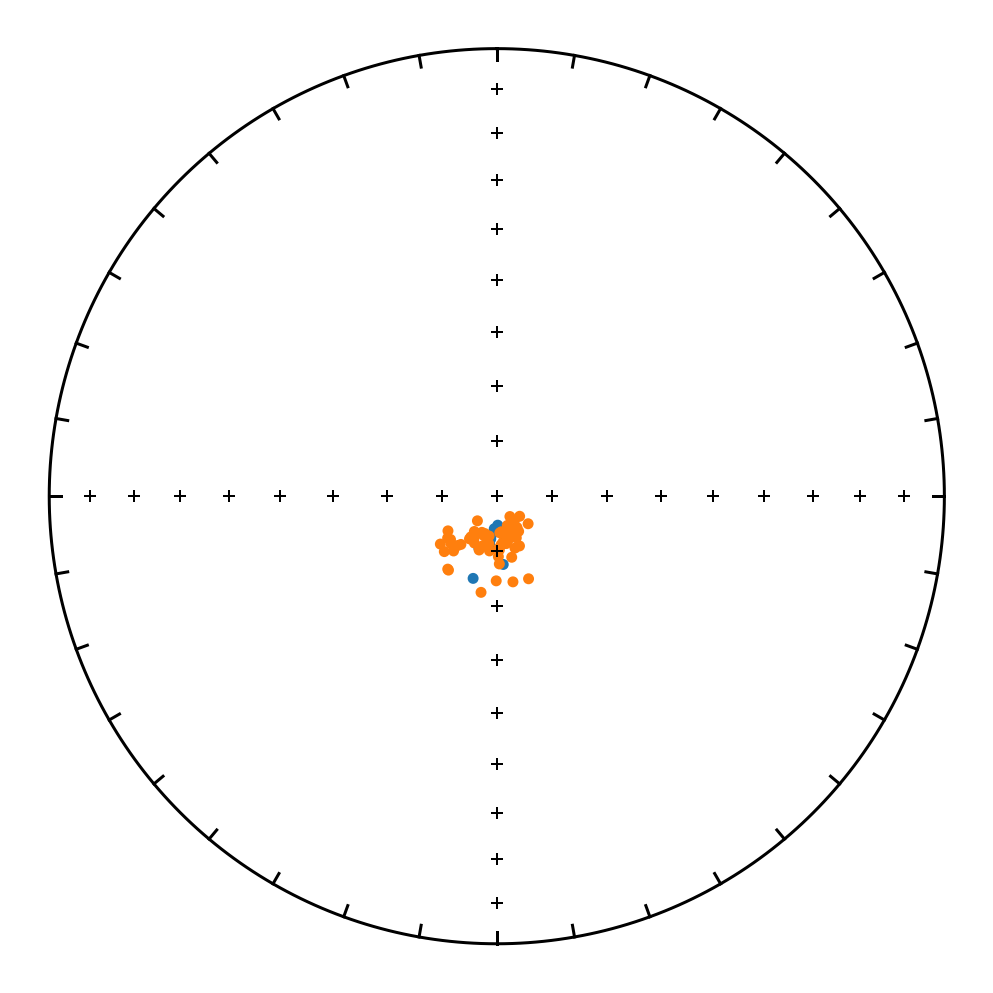

In [12]:
plt.figure(figsize=(7,7))
ipmag.plot_net()
ipmag.plot_di(RM70_bedding_data_Dox['pole_trend'].tolist(), RM70_bedding_data_Dox['pole_plunge'].tolist(), color = 'C0')
ipmag.plot_di(RM70_bedding_data_Cardenas['pole_trend'].tolist(), RM70_bedding_data_Cardenas['pole_plunge'].tolist(), color = 'C1')

In [13]:
RM70_Dox_di = ipmag.make_di_block(RM70_bedding_data_Dox['pole_trend'].tolist(), RM70_bedding_data_Dox['pole_plunge'].tolist())
RM70_Cardenas_di = ipmag.make_di_block(RM70_bedding_data_Cardenas['pole_trend'].tolist(), RM70_bedding_data_Cardenas['pole_plunge'].tolist())

In [14]:
ipmag.common_mean_watson(RM70_Dox_di, RM70_Cardenas_di)

Results of Watson V test: 

Watson's V:           2.2
Critical value of V:  6.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.3
Critical angle for M&M1990:   2.2
The McFadden and McElhinny (1990) classification for
this test is: 'A'


(1, 1.291373674995693, 2.169030466849585, 'A')

## Red Canyon UI1 RM77

Bedding orientations are taken from the Hakatal Fm. 

In [15]:
RM77_UI1_bedding_data = pd.read_csv('../data/orientations/UI1.csv')
RM77_UI1_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.930067,36.025128,416200.7669,3987135.537,36.025128,-111.930067,12S,Bedding,11.793283,36.233635,306.233643,10.436951,Hakatai,Thu Apr 15 17:06:23 2021
1,-111.930247,36.024664,416184.0298,3987084.266,36.024664,-111.930247,12S,Bedding,14.650157,25.522100,295.522095,10.436951,Hakatai,Thu Apr 15 17:04:17 2021
2,-111.930218,36.024679,416186.6492,3987085.901,36.024679,-111.930218,12S,Bedding,14.601674,13.139299,283.139282,10.436951,Hakatai,Thu Apr 15 17:04:08 2021
3,-111.930084,36.024683,416198.7521,3987086.190,36.024683,-111.930084,12S,Bedding,11.518700,14.794915,284.794922,10.436951,Hakatai,Thu Apr 15 17:03:56 2021
4,-111.930208,36.024635,416187.4936,3987080.999,36.024635,-111.930208,12S,Bedding,15.243930,9.261298,279.261292,10.436951,Hakatai,Thu Apr 15 16:53:52 2021


In [16]:
RM77_UI1_bedding_data['pole_trend'] = RM77_UI1_bedding_data['dipAzimuth']-180
RM77_UI1_bedding_data['pole_plunge'] = 90-RM77_UI1_bedding_data['dip']
RM77_UI1_bedding_poles_mean = ipmag.fisher_mean(RM77_UI1_bedding_data['pole_trend'].tolist(),RM77_UI1_bedding_data['pole_plunge'].tolist())
RM77_UI1_bedding_mean = ipmag.fisher_mean(RM77_UI1_bedding_data['strike'].tolist(),RM77_UI1_bedding_data['dip'].tolist())

print('mean strike: ', round(RM77_UI1_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM77_UI1_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM77_UI1_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  285.5  mean dip dir:  15.5  mean dip:  14.0


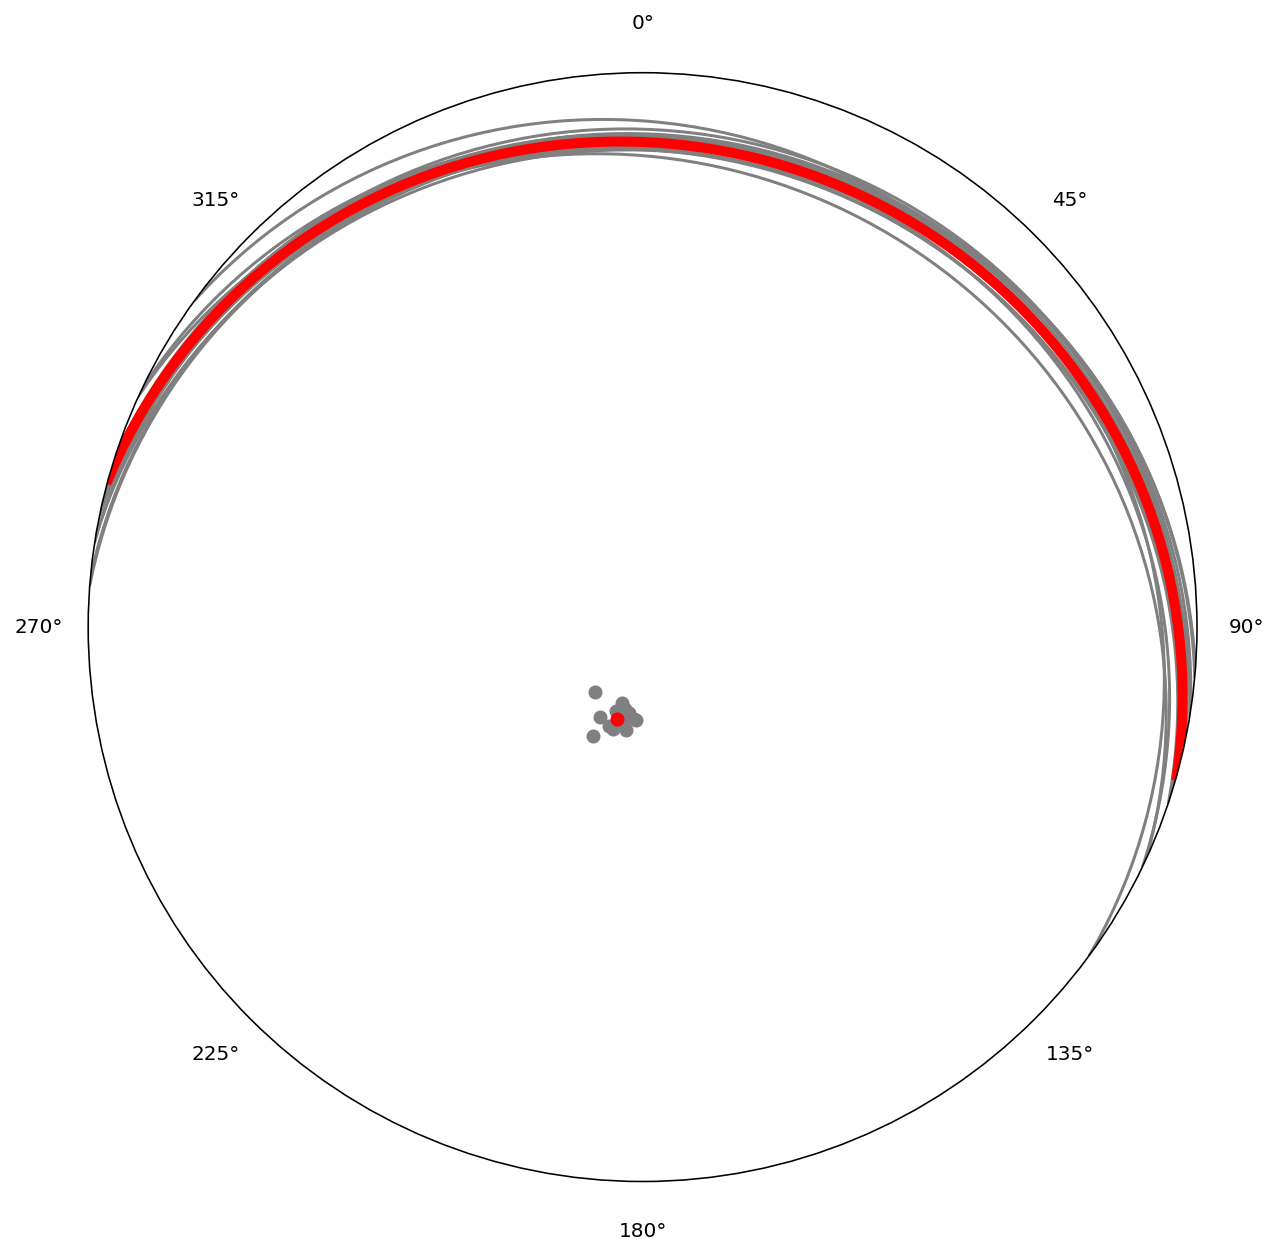

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM77_UI1_bedding_data['strike'], RM77_UI1_bedding_data['dip'],color='grey')
ax.plane(RM77_UI1_bedding_mean['dec'], RM77_UI1_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM77_UI1_bedding_data['strike'], RM77_UI1_bedding_data['dip'],color='grey')
ax.pole(RM77_UI1_bedding_mean['dec'], RM77_UI1_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

## Hance dike UI2 RM77
Bedding orientations are taken from the Hakatal Fm. 

In [18]:
RM77_UI2_bedding_data = pd.read_csv('../data/orientations/UI2.csv')
RM77_UI2_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.918402,36.045701,417273.2785,3989407.549,36.045701,-111.918402,12S,Bedding,25.459208,317.240997,227.240997,10.436951,Hakatai,Thu Apr 15 20:00:43 2021
1,-111.918375,36.045733,417275.7654,3989411.030,36.045733,-111.918375,12S,Bedding,28.797628,327.368561,237.368561,10.436951,Hakatai,Thu Apr 15 20:00:01 2021
2,-111.918430,36.045681,417270.7485,3989405.356,36.045681,-111.918430,12S,Bedding,20.514587,330.244202,240.244202,10.436951,Hakatai,Thu Apr 15 19:55:52 2021
3,-111.918387,36.045706,417274.6577,3989408.111,36.045706,-111.918387,12S,Bedding,28.200426,332.502808,242.502808,10.436951,Hakatai,Thu Apr 15 19:53:02 2021
4,-111.918756,36.045533,417241.2731,3989389.214,36.045533,-111.918756,12S,Bedding,24.072506,328.366425,238.366425,10.436951,Hakatai,Thu Apr 15 19:52:29 2021


In [19]:
RM77_UI2_bedding_data['pole_trend'] = RM77_UI2_bedding_data['dipAzimuth']-180
RM77_UI2_bedding_data['pole_plunge'] = 90-RM77_UI2_bedding_data['dip']
RM77_UI2_bedding_poles_mean = ipmag.fisher_mean(RM77_UI2_bedding_data['pole_trend'].tolist(),RM77_UI2_bedding_data['pole_plunge'].tolist())
RM77_UI2_bedding_mean = ipmag.fisher_mean(RM77_UI2_bedding_data['strike'].tolist(),RM77_UI2_bedding_data['dip'].tolist())

print('mean strike: ', round(RM77_UI2_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM77_UI2_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM77_UI2_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  235.4  mean dip dir:  325.4  mean dip:  23.9


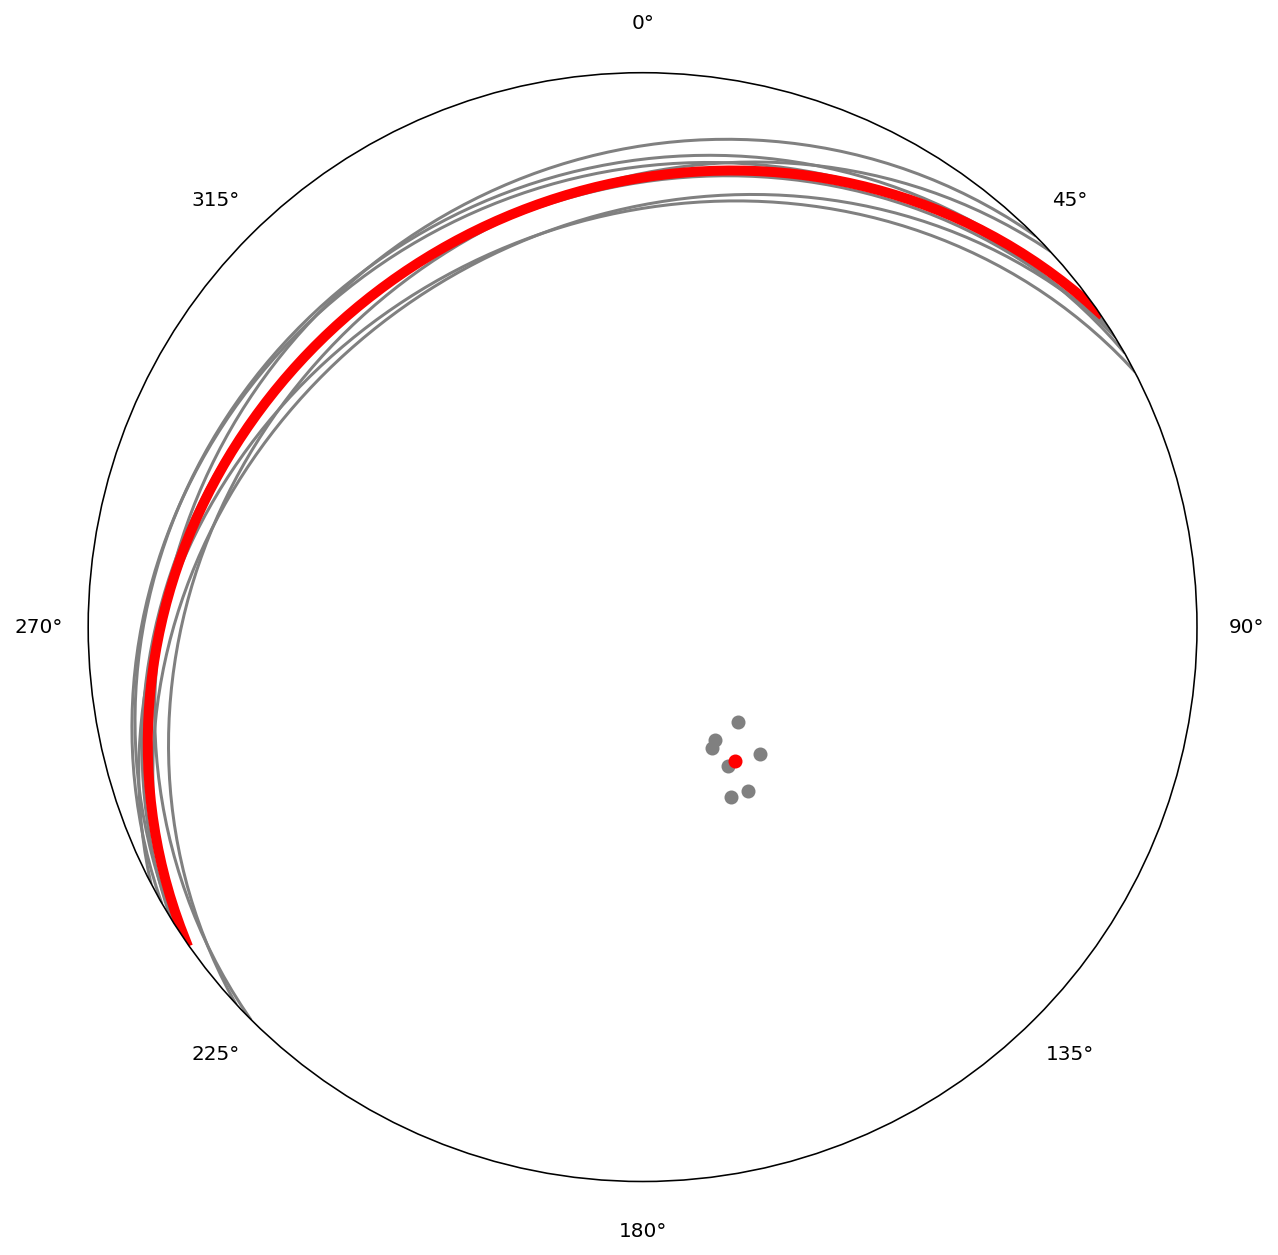

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM77_UI2_bedding_data['strike'], RM77_UI2_bedding_data['dip'],color='grey')
ax.plane(RM77_UI2_bedding_mean['dec'], RM77_UI2_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM77_UI2_bedding_data['strike'], RM77_UI2_bedding_data['dip'],color='grey')
ax.pole(RM77_UI2_bedding_mean['dec'], RM77_UI2_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

## Hance Sill UI3 RM77

Orientations are taken from both the intrusion and the Bass Fm. Plane orientations were taken from only the Bass, whereas only columnar jointing data are taken from the intrusions. We compare the orientations and use the bedding orientation from the Bass to correct for directions of this site.

In [21]:
RM77_UI3_bedding_data = pd.read_csv('../data/orientations/UI3.csv')
RM77_UI3_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-111.927154,36.046371,416485.6794,3989489.378,36.046371,-111.927154,12S,Columnar Joint,74.207489,248.816086,158.816086,10.436951,Unkar Intrusions,Fri Apr 16 09:46:49 2021
1,-111.927170,36.046374,416484.2362,3989489.636,36.046374,-111.927170,12S,Columnar Joint,86.423599,166.832459,76.832459,10.436951,Unkar Intrusions,Fri Apr 16 09:46:42 2021
2,-111.927490,36.046334,416455.3581,3989485.547,36.046334,-111.927490,12S,Columnar Joint,78.448029,264.024170,174.024170,10.436951,Unkar Intrusions,Fri Apr 16 09:45:33 2021
3,-111.927516,36.046320,416452.9293,3989484.026,36.046320,-111.927516,12S,Columnar Joint,76.376534,264.545654,174.545654,10.436951,Unkar Intrusions,Fri Apr 16 09:45:29 2021
4,-111.927417,36.046326,416461.9325,3989484.555,36.046326,-111.927417,12S,Columnar Joint,76.793640,264.549957,174.549957,10.436951,Unkar Intrusions,Fri Apr 16 09:45:04 2021


In [22]:
RM77_UI3_plane = RM77_UI3_bedding_data[RM77_UI3_bedding_data['planeType'] != ' Columnar Joint']
RM77_UI3_columns = RM77_UI3_bedding_data[RM77_UI3_bedding_data['planeType'] == ' Columnar Joint']

In [23]:
RM77_UI3_plane['pole_trend'] = RM77_UI3_plane['dipAzimuth']-180
RM77_UI3_plane['pole_plunge'] = 90-RM77_UI3_plane['dip']
RM77_UI3_plane_poles_mean = ipmag.fisher_mean(RM77_UI3_plane['pole_trend'].tolist(),RM77_UI3_plane['pole_plunge'].tolist())
RM77_UI3_plane_mean = ipmag.fisher_mean(RM77_UI3_plane['strike'].tolist(),RM77_UI3_plane['dip'].tolist())

print('mean strike: ', round(RM77_UI3_plane_mean['dec'],1), 
      ' mean dip dir: ', round((RM77_UI3_plane_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM77_UI3_plane_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  352.8  mean dip dir:  82.8  mean dip:  11.3


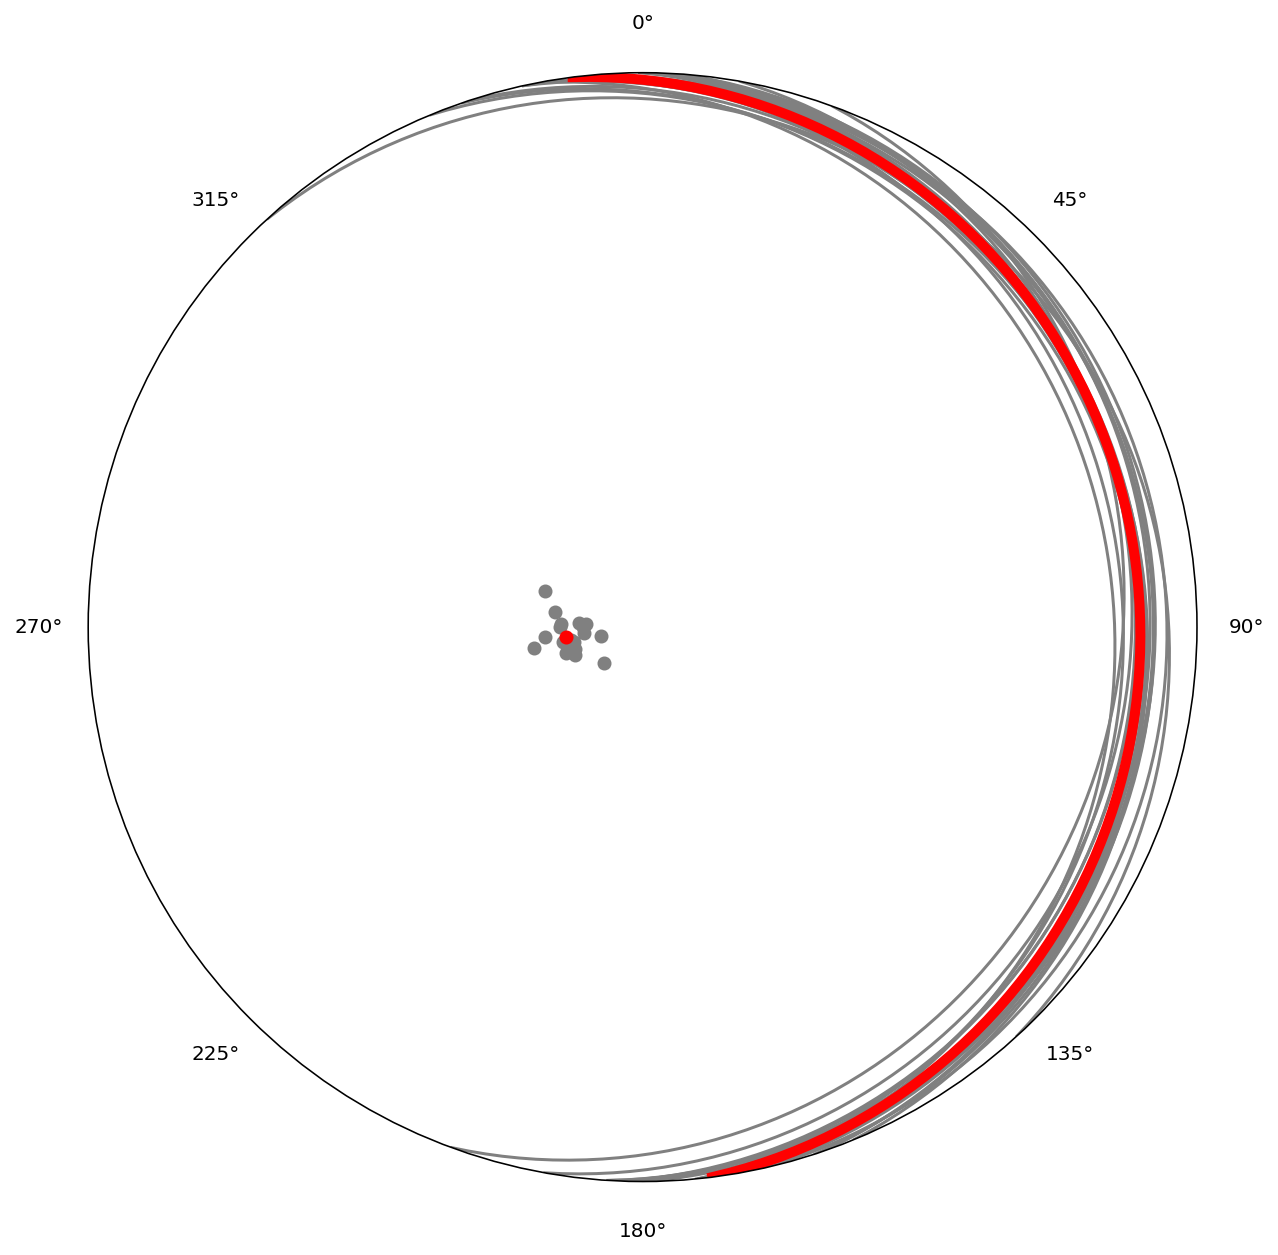

In [24]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM77_UI3_plane['strike'], RM77_UI3_plane['dip'],color='grey')
ax.plane(RM77_UI3_plane_mean['dec'], RM77_UI3_plane_mean['inc'],color='red',linewidth=5)
ax.pole(RM77_UI3_plane['strike'], RM77_UI3_plane['dip'],color='grey')
ax.pole(RM77_UI3_plane_mean['dec'], RM77_UI3_plane_mean['inc'],color='red')
plt.tight_layout()
plt.show()

In [25]:
UI3_column_mean = mplstereonet.fit_girdle(RM77_UI3_columns['strike'], RM77_UI3_columns['dip'])
UI3_column_mean

(329.8632155194799, 12.68415134935293)

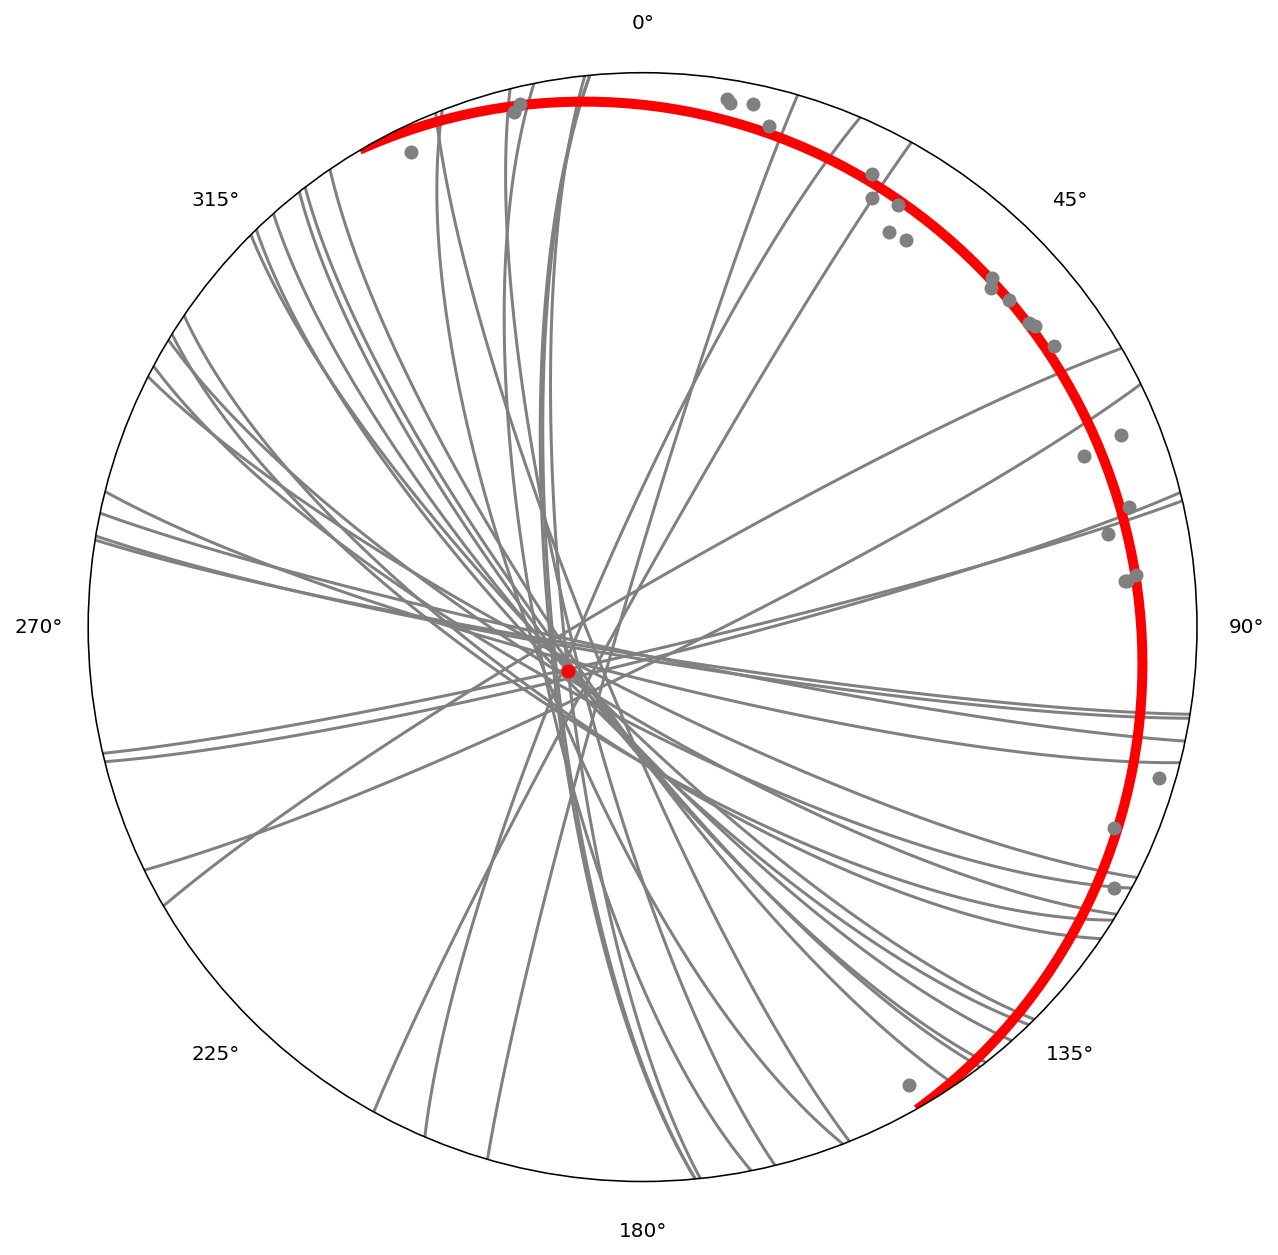

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM77_UI3_columns['strike'], RM77_UI3_columns['dip'],color='grey')
ax.plane(UI3_column_mean[0], UI3_column_mean[1],color='red',linewidth=5)
ax.pole(RM77_UI3_columns['strike'], RM77_UI3_columns['dip'],color='grey')
ax.pole(UI3_column_mean[0], UI3_column_mean[1],color='red')
plt.tight_layout()
plt.show()

## Hotauta Canyon UI4 RM107
Bedding orientations are taken from the Bass Fm. 

In [27]:
RM107_UI4_bedding_data = pd.read_csv('../data/orientations/UI4.csv')
RM107_UI4_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-112.329579,36.235014,380521.4762,4010834.912,36.235014,-112.329579,12S,Bedding,30.318155,22.090952,292.090942,10.436951,Bass,Fri Apr 16 17:34:28 2021
1,-112.329342,36.234911,380542.6796,4010823.218,36.234911,-112.329342,12S,Bedding,26.717785,35.716812,305.716797,10.436951,Bass,Fri Apr 16 17:33:14 2021
2,-112.329441,36.234918,380533.7568,4010824.144,36.234918,-112.329441,12S,Bedding,25.230885,57.547863,327.547852,10.436951,Bass,Fri Apr 16 17:31:36 2021
3,-112.329540,36.234879,380524.8037,4010819.898,36.234879,-112.329540,12S,Bedding,31.482094,40.956203,310.956207,10.436951,Bass,Fri Apr 16 17:31:13 2021
4,-112.329432,36.234876,380534.4943,4010819.470,36.234876,-112.329432,12S,Bedding,26.236666,20.692341,290.692322,10.436951,Bass,Fri Apr 16 17:30:52 2021


In [28]:
RM107_UI4_bedding_data['pole_trend'] = RM107_UI4_bedding_data['dipAzimuth']-180
RM107_UI4_bedding_data['pole_plunge'] = 90-RM107_UI4_bedding_data['dip']
RM77_UI4_bedding_poles_mean = ipmag.fisher_mean(RM107_UI4_bedding_data['pole_trend'].tolist(),RM107_UI4_bedding_data['pole_plunge'].tolist())
RM77_UI4_bedding_mean = ipmag.fisher_mean(RM107_UI4_bedding_data['strike'].tolist(),RM107_UI4_bedding_data['dip'].tolist())

print('mean strike: ', round(RM77_UI4_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM77_UI4_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM77_UI4_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  300.6  mean dip dir:  30.6  mean dip:  28.7


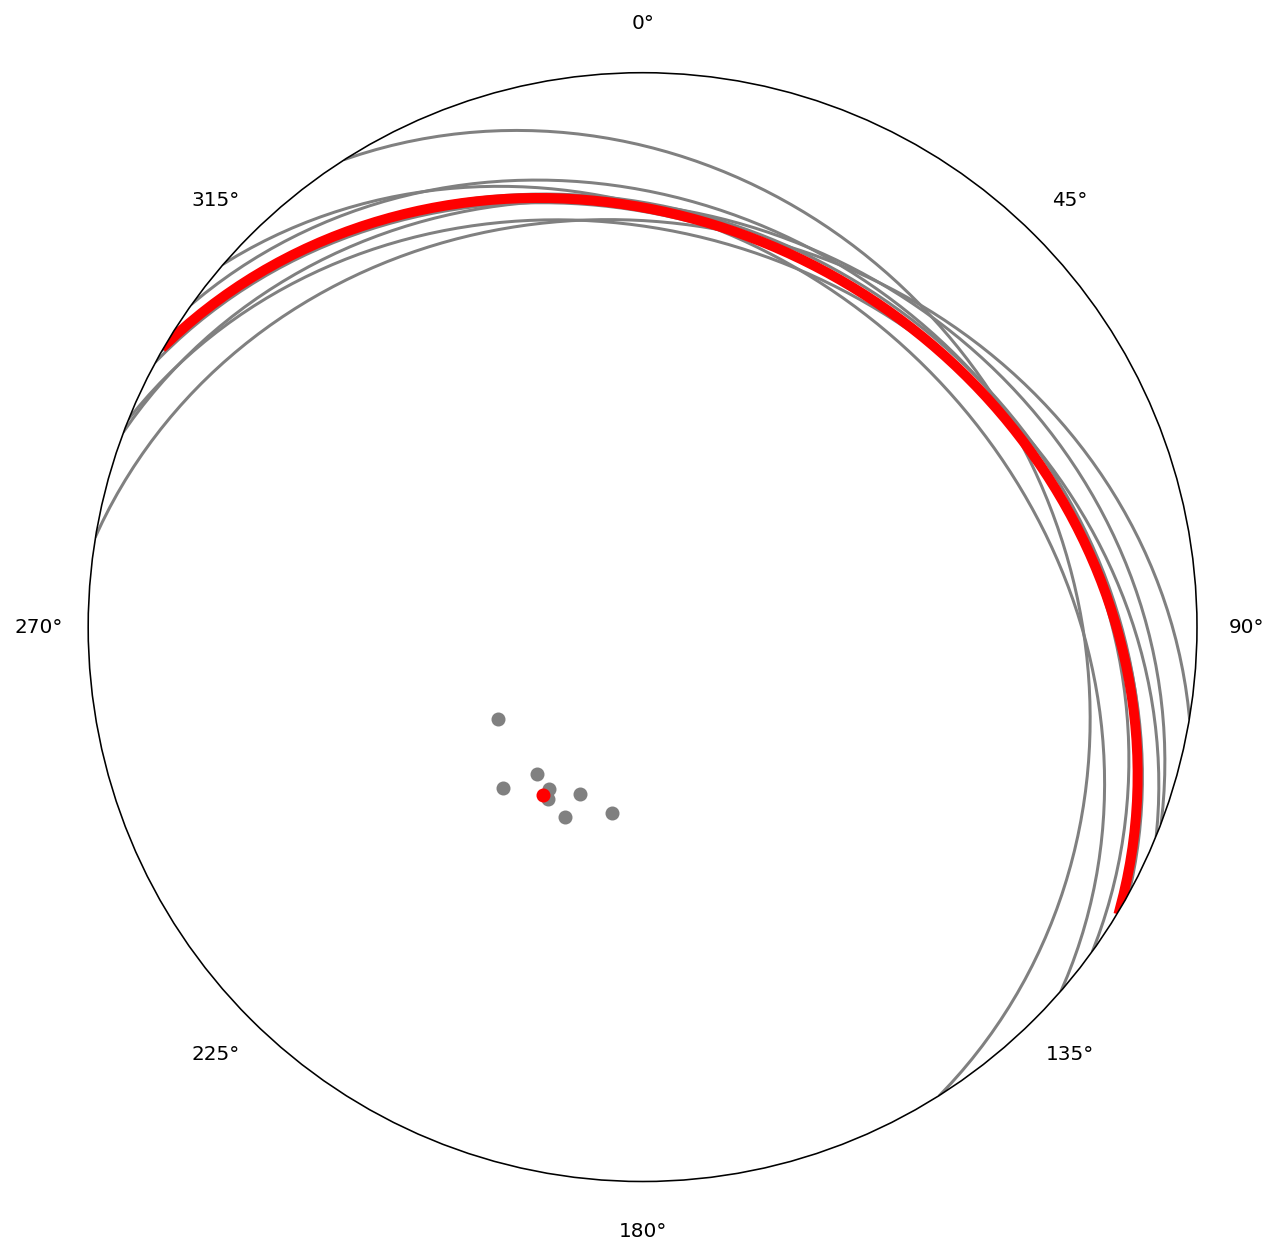

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM107_UI4_bedding_data['strike'], RM107_UI4_bedding_data['dip'],color='grey')
ax.plane(RM77_UI4_bedding_mean['dec'], RM77_UI4_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM107_UI4_bedding_data['strike'], RM107_UI4_bedding_data['dip'],color='grey')
ax.pole(RM77_UI4_bedding_mean['dec'], RM77_UI4_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()

## Stone Creek UI5 RM132
Bedding orientations are taken from the Bass Fm. 

In [30]:
RM132_UI5_bedding_data = pd.read_csv('../data/orientations/UI5.csv')
RM132_UI5_bedding_data.head()

,X,Y,x,y,latitude,longitude,zone,planeType,dip,dipAzimuth,strike,declination,unitId,timedate
0,-112.452643,36.347942,369650.0477,4023520.918,36.347942,-112.452643,12S,Bedding,11.534797,54.504204,324.504211,10.436951,Bass,Sat Apr 17 15:09:08 2021
1,-112.452327,36.347731,369678.0394,4023497.117,36.347731,-112.452327,12S,Bedding,10.130785,54.039410,324.039398,10.436951,Bass,Sat Apr 17 15:08:39 2021
2,-112.451611,36.347509,369741.9367,4023471.452,36.347509,-112.451611,12S,Bedding,8.561149,56.685127,326.685120,10.436951,Bass,Sat Apr 17 15:08:27 2021
3,-112.452725,36.348306,369643.3081,4023561.378,36.348306,-112.452725,12S,Bedding,10.070422,55.800797,325.800781,10.436951,Bass,Sat Apr 17 14:41:17 2021
4,-112.452706,36.348287,369644.9983,4023559.219,36.348287,-112.452706,12S,Bedding,9.603053,35.435001,305.434998,10.436951,Bass,Sat Apr 17 14:41:07 2021


In [31]:
RM132_UI5_bedding_data['pole_trend'] = RM132_UI5_bedding_data['dipAzimuth']-180
RM132_UI5_bedding_data['pole_plunge'] = 90-RM132_UI5_bedding_data['dip']
RM77_UI5_bedding_poles_mean = ipmag.fisher_mean(RM132_UI5_bedding_data['pole_trend'].tolist(),RM132_UI5_bedding_data['pole_plunge'].tolist())
RM77_UI5_bedding_mean = ipmag.fisher_mean(RM132_UI5_bedding_data['strike'].tolist(),RM132_UI5_bedding_data['dip'].tolist())

print('mean strike: ', round(RM77_UI5_bedding_mean['dec'],1), 
      ' mean dip dir: ', round((RM77_UI5_bedding_mean['dec']+90)%360,1), 
      ' mean dip: ', round(RM77_UI5_bedding_mean['inc'],1))
# print('mean pole trend: ', round(RM65_bedding_poles_mean['dec'],2), 'mean pole plunge: ', round(RM65_bedding_poles_mean['inc'],2))

mean strike:  318.7  mean dip dir:  48.7  mean dip:  12.0


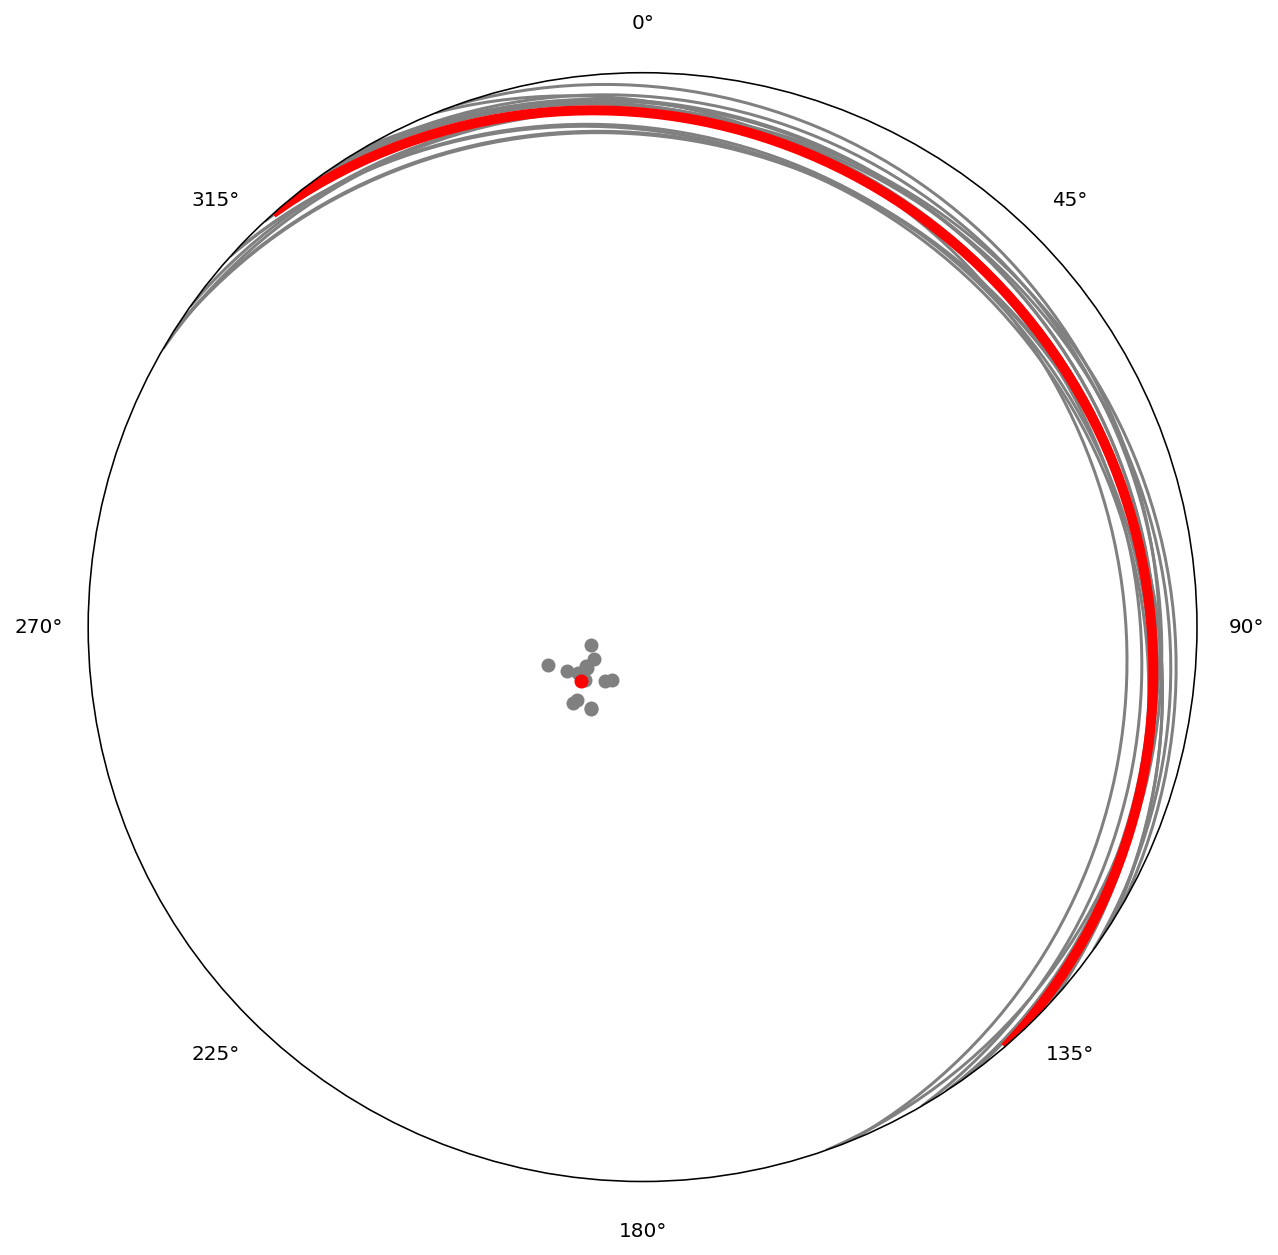

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(RM132_UI5_bedding_data['strike'], RM132_UI5_bedding_data['dip'],color='grey')
ax.plane(RM77_UI5_bedding_mean['dec'], RM77_UI5_bedding_mean['inc'],color='red',linewidth=5)
ax.pole(RM132_UI5_bedding_data['strike'], RM132_UI5_bedding_data['dip'],color='grey')
ax.pole(RM77_UI5_bedding_mean['dec'], RM77_UI5_bedding_mean['inc'],color='red')
plt.tight_layout()
plt.show()